## MobileNet

In [1]:
# ==========================================
# 📘 STEP 1: IMPORT LIBRARIES
# ==========================================
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import os

2025-10-28 16:15:42.709851: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761668142.974475      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761668143.051274      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# -----------------------------------------
# 1️⃣ Dataset Path (CHANGE THIS LINE)
# -----------------------------------------
# Replace 'gauravjadhav/face-engagement-dataset' with your Kaggle dataset path
dataset_path = '/kaggle/input/final-dataset-256'  

# Example structure expected:
# /kaggle/input/face-engagement-dataset/train/Engaged
# /kaggle/input/face-engagement-dataset/train/Disengaged

img_size = 160
batch_size = 32

In [3]:
# ==========================================
# 📁 STEP 2: DATA PATHS
# ==========================================
base_dir = "/kaggle/input/final-dataset-256/Final Dataset 256"

train_dir = base_dir  # since both Engagement and Disengagement are here

# Optional: If you want to split some data for validation, use validation_split
val_split = 0.2

In [4]:
# ==========================================
# 🧩 STEP 3: DATA GENERATORS
# ==========================================
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=val_split
)

train_data = datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="training",
    shuffle=True
)

val_data = datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="validation",
    shuffle=False
)

print("\n✅ Class indices:", train_data.class_indices)
print("✅ Number of classes:", len(train_data.class_indices))

Found 12800 images belonging to 2 classes.
Found 3200 images belonging to 2 classes.

✅ Class indices: {'Disengagement': 0, 'Engagement': 1}
✅ Number of classes: 2


In [5]:
# ==========================================
# 🧠 STEP 4: LOAD BASE MODEL (MobileNetV2)
# ==========================================
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

I0000 00:00:1761668176.533744      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761668176.534439      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# ==========================================
# 🚀 STEP 5: TRAIN MODEL
# ==========================================
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1761668186.922696      76 service.cc:148] XLA service 0x7e8de00117d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761668186.923834      76 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761668186.923852      76 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1761668187.840417      76 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/400 ━━━━━━━━━━━━━━━━━━━━ 1:26:15 13s/step - accuracy: 0.4688 - loss: 0.8805

I0000 00:00:1761668192.399932      76 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


400/400 ━━━━━━━━━━━━━━━━━━━━ 110s 243ms/step - accuracy: 0.6515 - loss: 0.5951 - val_accuracy: 0.6075 - val_loss: 0.7403
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 29s 71ms/step - accuracy: 0.8398 - loss: 0.3555 - val_accuracy: 0.6103 - val_loss: 0.7834
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 29s 71ms/step - accuracy: 0.8779 - loss: 0.2862 - val_accuracy: 0.6178 - val_loss: 0.8271
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.9028 - loss: 0.2448 - val_accuracy: 0.6191 - val_loss: 0.8744
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.9185 - loss: 0.2134 - val_accuracy: 0.6119 - val_loss: 0.9335
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.9366 - loss: 0.1801 - val_accuracy: 0.6162 - val_loss: 0.9305
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.9416 - loss: 0.1628 - val_accuracy: 0.6284 - val_loss: 0.9833
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.9552 - loss: 0.1422 - val_accur

100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step


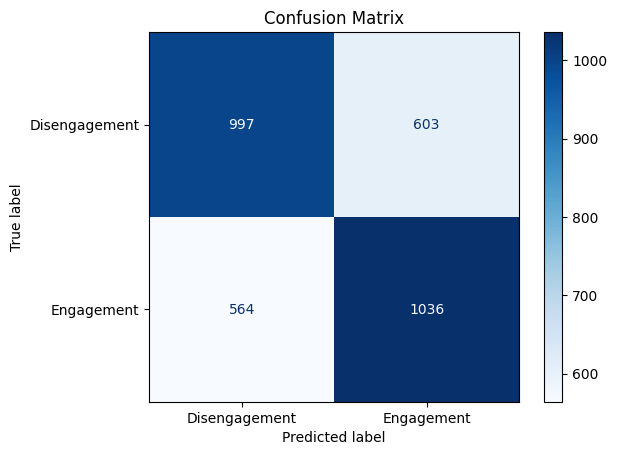


📈 Classification Report:
                precision    recall  f1-score   support

Disengagement       0.64      0.62      0.63      1600
   Engagement       0.63      0.65      0.64      1600

     accuracy                           0.64      3200
    macro avg       0.64      0.64      0.64      3200
 weighted avg       0.64      0.64      0.64      3200



In [7]:
# ==========================================
# 📊 STEP 6: EVALUATION
# ==========================================
val_data.reset()
y_true = val_data.classes
y_pred_probs = model.predict(val_data)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(val_data.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\n📈 Classification Report:\n", classification_report(y_true, y_pred, target_names=list(val_data.class_indices.keys())))

In [8]:
# -----------------------------------------
# 7️⃣ Evaluate & Save Model
# -----------------------------------------
loss, acc = model.evaluate(val_data)
print(f"\n✅ Final Validation Accuracy: {acc*100:.2f}%")
print(f"❌ Final Validation Loss: {loss:.4f}")

model.save('/kaggle/working/mobilenet_face_engagement_model.h5')
print("\n💾 Model saved as mobilenet_face_engagement_model.h5")

100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.5563 - loss: 1.1590

✅ Final Validation Accuracy: 63.53%
❌ Final Validation Loss: 1.0608

💾 Model saved as mobilenet_face_engagement_model.h5


/tmp/ipykernel_19/2683950250.py:22: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_19/2683950250.py:22: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


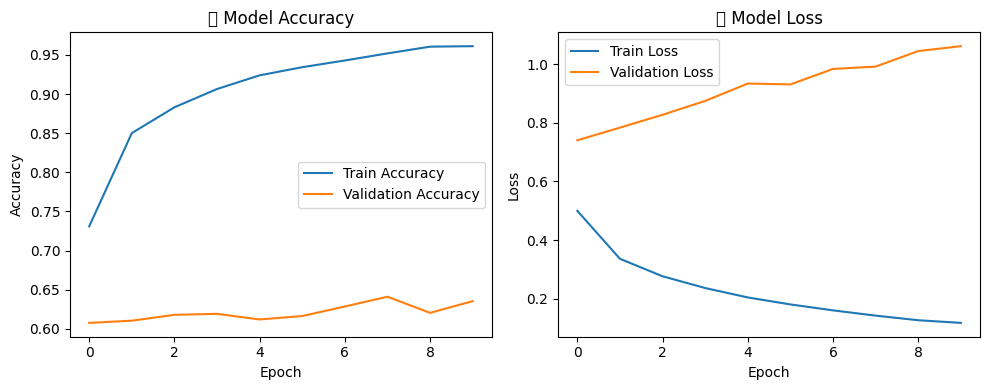

In [9]:
# -----------------------------------------
# 8️⃣ Plot Accuracy & Loss Graphs
# -----------------------------------------
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('📈 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('📉 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step


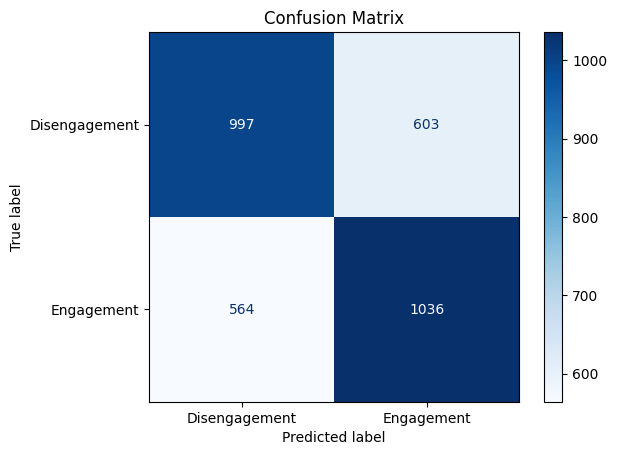


📊 Classification Report:

               precision    recall  f1-score   support

Disengagement       0.64      0.62      0.63      1600
   Engagement       0.63      0.65      0.64      1600

     accuracy                           0.64      3200
    macro avg       0.64      0.64      0.64      3200
 weighted avg       0.64      0.64      0.64      3200



In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# -----------------------------------------
# 🔟 Confusion Matrix & Report
# -----------------------------------------
y_true = val_data.classes
y_pred_probs = model.predict(val_data)
y_pred = (y_pred_probs > 0.5).astype("int32")

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(val_data.class_indices.keys()))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(val_data.class_indices.keys())))


In [11]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=list(val_data.class_indices.keys())))


Accuracy: 0.6353125

Classification Report:
                precision    recall  f1-score   support

Disengagement       0.64      0.62      0.63      1600
   Engagement       0.63      0.65      0.64      1600

     accuracy                           0.64      3200
    macro avg       0.64      0.64      0.64      3200
 weighted avg       0.64      0.64      0.64      3200



In [12]:
# -----------------------------------------
# 9️⃣ Display Summary
# -----------------------------------------
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,750,277 (10.49 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 328,196 (1.25 MB)

In [13]:
print("Class indices:", val_data.class_indices)
print("Number of classes:", len(val_data.class_indices))


Class indices: {'Disengagement': 0, 'Engagement': 1}
Number of classes: 2


In [14]:
history_mobilenet = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.9703 - loss: 0.1021 - val_accuracy: 0.6269 - val_loss: 1.0879
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.9702 - loss: 0.0967 - val_accuracy: 0.6237 - val_loss: 1.0987
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - accuracy: 0.9751 - loss: 0.0855 - val_accuracy: 0.6319 - val_loss: 1.1295
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 31s 76ms/step - accuracy: 0.9770 - loss: 0.0788 - val_accuracy: 0.6084 - val_loss: 1.1724
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 31s 77ms/step - accuracy: 0.9802 - loss: 0.0721 - val_accuracy: 0.6219 - val_loss: 1.1588
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.9838 - loss: 0.0643 - val_accuracy: 0.6297 - val_loss: 1.2087
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - accuracy: 0.9815 - loss: 0.0627 - val_accuracy: 0.6403 - val_loss: 1.1826
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.9837 - loss: 0.0574 - 

## RestNet50

In [15]:
# ==========================================
# 📘 STEP 1: IMPORT LIBRARIES
# ==========================================
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import os


In [16]:
# ==========================================
# 📁 STEP 2: DATA PATHS
# ==========================================
base_dir = "/kaggle/input/final-dataset-256/Final Dataset 256"

val_split = 0.2

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=val_split
)

train_data = datagen.flow_from_directory(
    directory=base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="training",
    shuffle=True
)

val_data = datagen.flow_from_directory(
    directory=base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="validation",
    shuffle=False
)

print("\n✅ Class indices:", train_data.class_indices)
print("✅ Number of classes:", len(train_data.class_indices))


Found 12800 images belonging to 2 classes.
Found 3200 images belonging to 2 classes.

✅ Class indices: {'Disengagement': 0, 'Engagement': 1}
✅ Number of classes: 2


In [17]:
# ==========================================
# 🧠 STEP 3: LOAD BASE MODEL (ResNet50)
# ==========================================
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
# ==========================================
# 🚀 STEP 4: TRAIN MODEL
# ==========================================
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


400/400 ━━━━━━━━━━━━━━━━━━━━ 65s 123ms/step - accuracy: 0.5059 - loss: 0.7149 - val_accuracy: 0.5000 - val_loss: 0.7157
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 43s 108ms/step - accuracy: 0.5917 - loss: 0.6650 - val_accuracy: 0.4866 - val_loss: 0.7005
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 44s 109ms/step - accuracy: 0.6163 - loss: 0.6445 - val_accuracy: 0.4981 - val_loss: 0.7131
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 44s 109ms/step - accuracy: 0.6301 - loss: 0.6342 - val_accuracy: 0.5094 - val_loss: 0.6983
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 44s 109ms/step - accuracy: 0.6494 - loss: 0.6160 - val_accuracy: 0.5500 - val_loss: 0.6747
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 44s 109ms/step - accuracy: 0.6481 - loss: 0.6073 - val_accuracy: 0.5444 - val_loss: 0.6705
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 44s 109ms/step - accuracy: 0.6586 - loss: 0.5995 - val_accuracy: 0.5675 - val_loss: 0.6703
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 44s 109ms/step - accuracy: 0.6476 - loss: 0.6009 - val

100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step


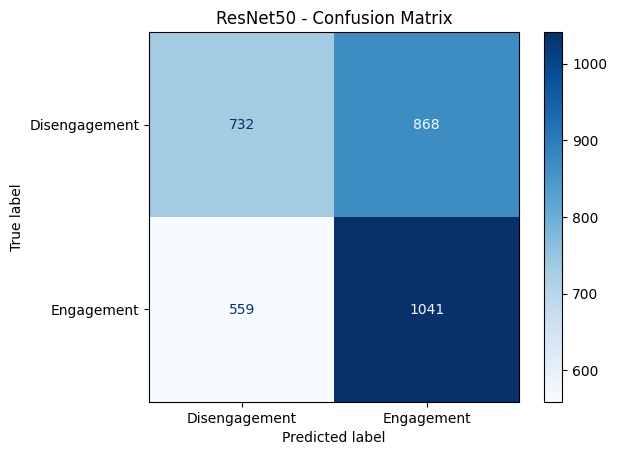


📈 ResNet50 - Classification Report:
                precision    recall  f1-score   support

Disengagement       0.57      0.46      0.51      1600
   Engagement       0.55      0.65      0.59      1600

     accuracy                           0.55      3200
    macro avg       0.56      0.55      0.55      3200
 weighted avg       0.56      0.55      0.55      3200



In [19]:
# ==========================================
# 📊 STEP 5: EVALUATION
# ==========================================
val_data.reset()
y_true = val_data.classes
y_pred_probs = model.predict(val_data)
y_pred = (y_pred_probs > 0.5).astype("int32")
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(val_data.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("ResNet50 - Confusion Matrix")
plt.show()

print("\n📈 ResNet50 - Classification Report:\n",
      classification_report(y_true, y_pred, target_names=list(val_data.class_indices.keys())))

In [20]:
history_resnet = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 44s 110ms/step - accuracy: 0.6759 - loss: 0.5816 - val_accuracy: 0.5381 - val_loss: 0.6600
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 43s 108ms/step - accuracy: 0.6781 - loss: 0.5738 - val_accuracy: 0.5813 - val_loss: 0.6696
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 44s 109ms/step - accuracy: 0.6704 - loss: 0.5708 - val_accuracy: 0.5641 - val_loss: 0.6594
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 44s 109ms/step - accuracy: 0.6783 - loss: 0.5680 - val_accuracy: 0.5597 - val_loss: 0.6558
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 44s 109ms/step - accuracy: 0.6855 - loss: 0.5630 - val_accuracy: 0.5484 - val_loss: 0.6552
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 44s 109ms/step - accuracy: 0.6803 - loss: 0.5620 - val_accuracy: 0.5947 - val_loss: 0.6555
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 44s 109ms/step - accuracy: 0.6883 - loss: 0.5598 - val_accuracy: 0.5984 - val_loss: 0.6569
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 44s 109ms/step - accuracy: 0.6944 - loss: 0

## VGG16

In [21]:
# ==========================================
# 📘 STEP 1: IMPORT LIBRARIES
# ==========================================
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import os

In [22]:
# ==========================================
# 📁 STEP 2: DATA PATHS
# ==========================================
base_dir = "/kaggle/input/final-dataset-256/Final Dataset 256"

val_split = 0.2

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=val_split
)

train_data = datagen.flow_from_directory(
    directory=base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="training",
    shuffle=True
)

val_data = datagen.flow_from_directory(
    directory=base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="validation",
    shuffle=False
)

print("\n✅ Class indices:", train_data.class_indices)
print("✅ Number of classes:", len(train_data.class_indices))

Found 12800 images belonging to 2 classes.
Found 3200 images belonging to 2 classes.

✅ Class indices: {'Disengagement': 0, 'Engagement': 1}
✅ Number of classes: 2


In [23]:
# ==========================================
# 🧠 STEP 3: LOAD BASE MODEL (VGG16)
# ==========================================
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
# ==========================================
# 🚀 STEP 4: TRAIN MODEL
# ==========================================
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


400/400 ━━━━━━━━━━━━━━━━━━━━ 112s 243ms/step - accuracy: 0.5575 - loss: 0.6801 - val_accuracy: 0.5200 - val_loss: 0.7006
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 92s 230ms/step - accuracy: 0.6727 - loss: 0.6159 - val_accuracy: 0.5419 - val_loss: 0.7268
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 91s 228ms/step - accuracy: 0.7019 - loss: 0.5774 - val_accuracy: 0.5444 - val_loss: 0.7511
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 91s 228ms/step - accuracy: 0.7198 - loss: 0.5452 - val_accuracy: 0.5419 - val_loss: 0.7771
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 91s 228ms/step - accuracy: 0.7348 - loss: 0.5242 - val_accuracy: 0.5069 - val_loss: 0.8017
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 91s 228ms/step - accuracy: 0.7532 - loss: 0.5036 - val_accuracy: 0.5222 - val_loss: 0.8032
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 91s 228ms/step - accuracy: 0.7508 - loss: 0.4980 - val_accuracy: 0.5350 - val_loss: 0.8018
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 91s 228ms/step - accuracy: 0.7629 - loss: 0.4859 - va

100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step


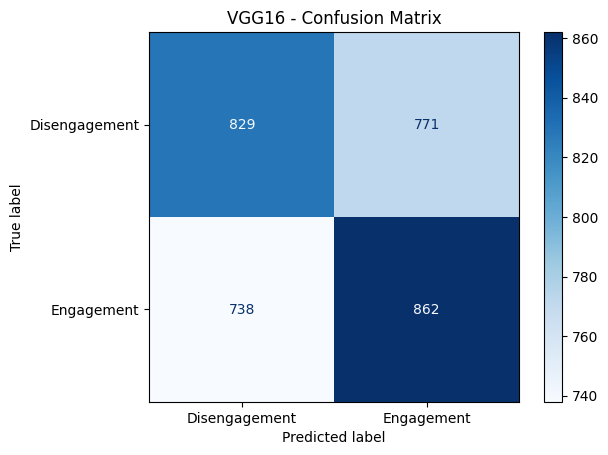


📈 VGG16 - Classification Report:
                precision    recall  f1-score   support

Disengagement       0.53      0.52      0.52      1600
   Engagement       0.53      0.54      0.53      1600

     accuracy                           0.53      3200
    macro avg       0.53      0.53      0.53      3200
 weighted avg       0.53      0.53      0.53      3200



In [25]:
# ==========================================
# 📊 STEP 5: EVALUATION
# ==========================================
val_data.reset()
y_true = val_data.classes
y_pred_probs = model.predict(val_data)
y_pred = (y_pred_probs > 0.5).astype("int32")

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(val_data.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("VGG16 - Confusion Matrix")
plt.show()

print("\n📈 VGG16 - Classification Report:\n",
      classification_report(y_true, y_pred, target_names=list(val_data.class_indices.keys())))

In [26]:
history_vgg = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 92s 229ms/step - accuracy: 0.7694 - loss: 0.4675 - val_accuracy: 0.5322 - val_loss: 0.8256
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 91s 229ms/step - accuracy: 0.7724 - loss: 0.4613 - val_accuracy: 0.5244 - val_loss: 0.8365
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 91s 228ms/step - accuracy: 0.7726 - loss: 0.4632 - val_accuracy: 0.5247 - val_loss: 0.8509
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 91s 228ms/step - accuracy: 0.7774 - loss: 0.4558 - val_accuracy: 0.5259 - val_loss: 0.8403
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 93s 233ms/step - accuracy: 0.7898 - loss: 0.4408 - val_accuracy: 0.5366 - val_loss: 0.8552
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 91s 228ms/step - accuracy: 0.7888 - loss: 0.4394 - val_accuracy: 0.5362 - val_loss: 0.8521
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 91s 228ms/step - accuracy: 0.7909 - loss: 0.4363 - val_accuracy: 0.5312 - val_loss: 0.8849
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 91s 228ms/step - accuracy: 0.7919 - loss: 0

## Comparison

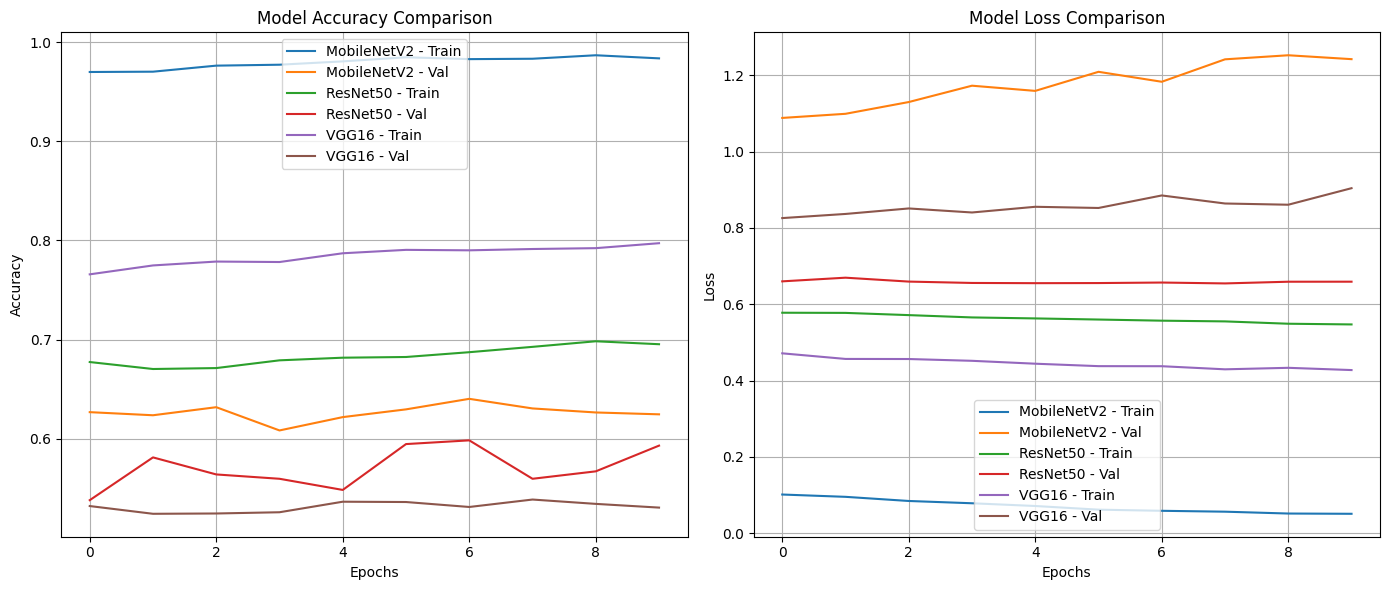

In [27]:
# ==========================================
# 📊 MODEL COMPARISON PLOTS
# ==========================================
import matplotlib.pyplot as plt

# ⚠️ Make sure you name your histories like this:
# history_mobilenet, history_resnet, history_vgg

# Example:
# history_mobilenet = model.fit(...)
# history_resnet = model.fit(...)
# history_vgg = model.fit(...)

plt.figure(figsize=(14, 6))

# -----------------------------
# 📈 1️⃣ Accuracy Comparison
# -----------------------------
plt.subplot(1, 2, 1)
plt.plot(history_mobilenet.history['accuracy'], label='MobileNetV2 - Train')
plt.plot(history_mobilenet.history['val_accuracy'], label='MobileNetV2 - Val')
plt.plot(history_resnet.history['accuracy'], label='ResNet50 - Train')
plt.plot(history_resnet.history['val_accuracy'], label='ResNet50 - Val')
plt.plot(history_vgg.history['accuracy'], label='VGG16 - Train')
plt.plot(history_vgg.history['val_accuracy'], label='VGG16 - Val')
plt.title("Model Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# -----------------------------
# 📉 2️⃣ Loss Comparison
# -----------------------------
plt.subplot(1, 2, 2)
plt.plot(history_mobilenet.history['loss'], label='MobileNetV2 - Train')
plt.plot(history_mobilenet.history['val_loss'], label='MobileNetV2 - Val')
plt.plot(history_resnet.history['loss'], label='ResNet50 - Train')
plt.plot(history_resnet.history['val_loss'], label='ResNet50 - Val')
plt.plot(history_vgg.history['loss'], label='VGG16 - Train')
plt.plot(history_vgg.history['val_loss'], label='VGG16 - Val')
plt.title("Model Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [28]:
print("\n📊 Final Accuracy & Loss Comparison:\n")
models = {
    "MobileNetV2": history_mobilenet,
    "ResNet50": history_resnet,
    "VGG16": history_vgg
}

for name, hist in models.items():
    acc = hist.history['val_accuracy'][-1]
    loss = hist.history['val_loss'][-1]
    print(f"{name}: Accuracy = {acc:.4f}, Loss = {loss:.4f}")


📊 Final Accuracy & Loss Comparison:

MobileNetV2: Accuracy = 0.6247, Loss = 1.2419
ResNet50: Accuracy = 0.5931, Loss = 0.6591
VGG16: Accuracy = 0.5306, Loss = 0.9039
